# Clustering Jerárquico y dendrogramas
* X dataset (array de n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

(150, 2)


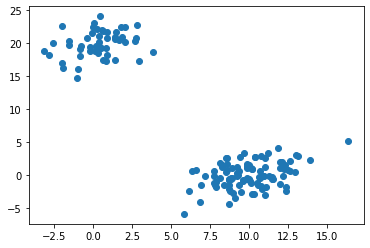

In [5]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size=[100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size=[50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [7]:
Z = linkage(X,"ward")

In [8]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [9]:
c, coph_dist = cophenet(Z,pdist(X))
c

0.9800148387574268

In [11]:
Z[0] #posición 1, posición 2, distancia, número de datos

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [12]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [19]:
print(Z[152-len(X)]) # Cluster 152
print(Z[158-len(X)]) # Cluster 158

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [14]:
X[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

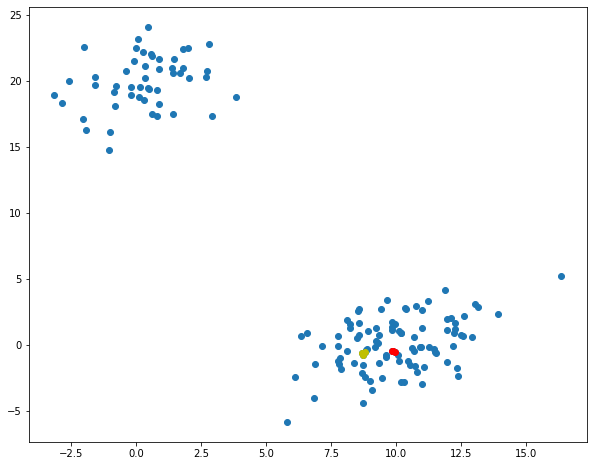

In [20]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1]) # Pintar todos los puntos
plt.scatter(X[idx,0], X[idx,1], c='r') # Destacamos en rojo los puntos interesantes
plt.scatter(X[idx2,0], X[idx2,1], c='y') # Destacamos en amarillo el segundo cluster
plt.show()

### Representación gráfica de un dendrograma

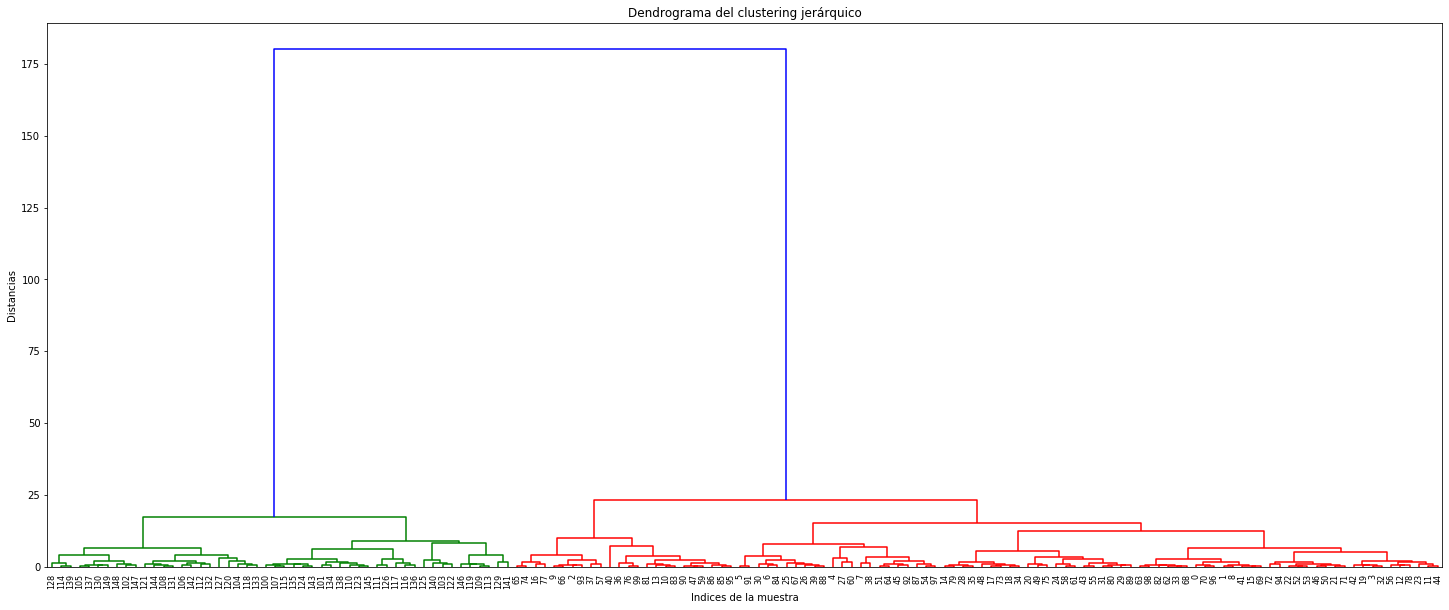

In [21]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Indices de la muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0)
plt.show()

In [24]:
Z[~4:,]

array([[284.        , 286.        ,  12.42734657,  54.        ],
       [290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

### Truncar el dendrograma

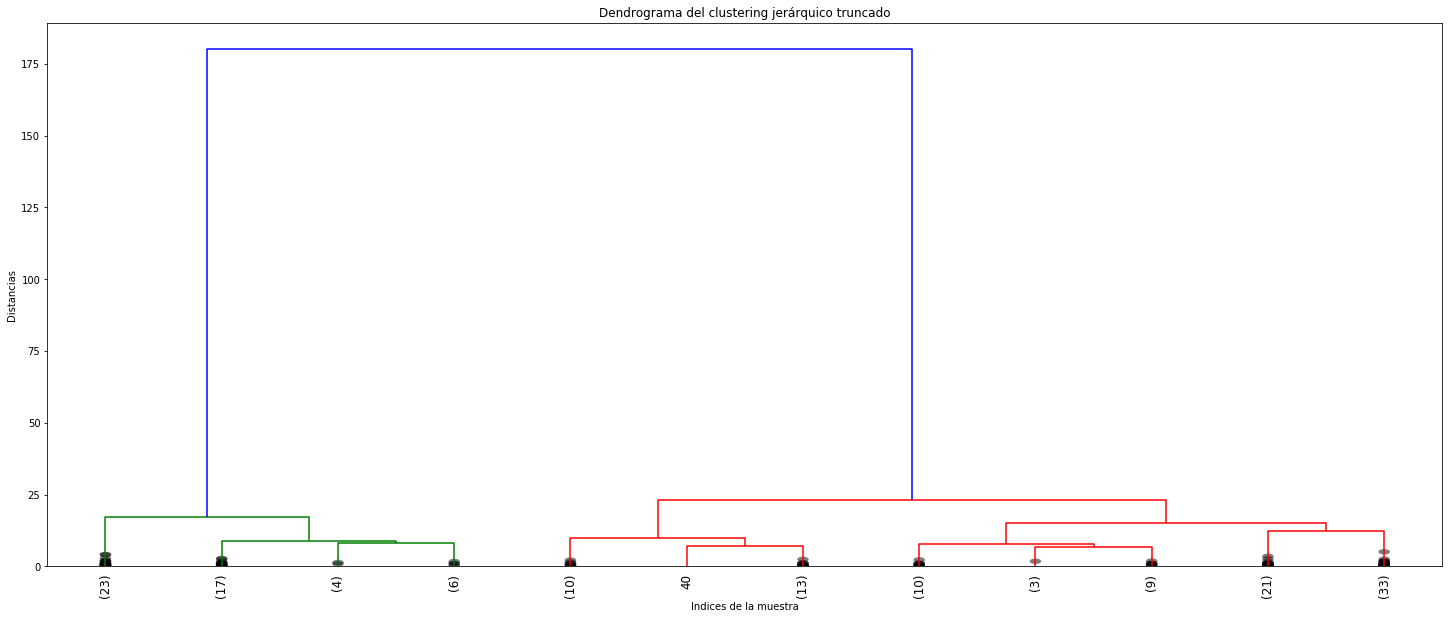

In [28]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Indices de la muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=12.0, truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True)
plt.show()

### Dendrograma tuneado

In [37]:
def dendrogram_tune(*args,**kwargs):
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('anotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title("Clustering Jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

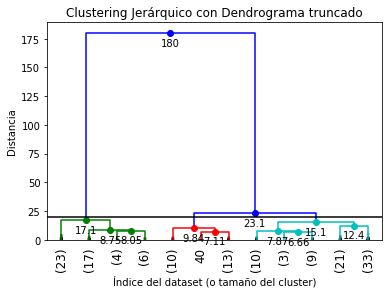

In [42]:
dendrogram_tune(Z,truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, max_d=20)
plt.show()

### Corte automático del dendrograma
inconsistency_i = (h_i-avg(h_j))/std(h_j)

In [43]:
from scipy.cluster.hierarchy import inconsistent

In [45]:
depth = 5
incons = inconsistent(Z, depth)
incons[-10:] # Promedio, Desviación, Contador, Inconsistencia

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

### Método del codo

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


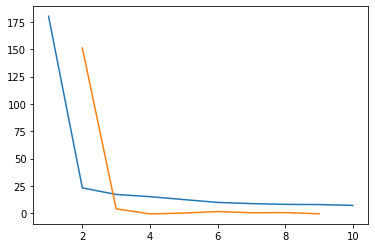

El número óptimo de clusters es 2


In [53]:
last = Z[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx= np.arange(1,len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() + 2
print("El número óptimo de clusters es %s"%str(k))

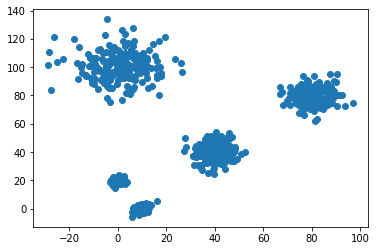

In [55]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])
x2=np.concatenate((X,c,d,e),)
plt.scatter(x2[:,0], x2[:,1])
plt.show()

In [56]:
Z2 = linkage(x2, "ward")

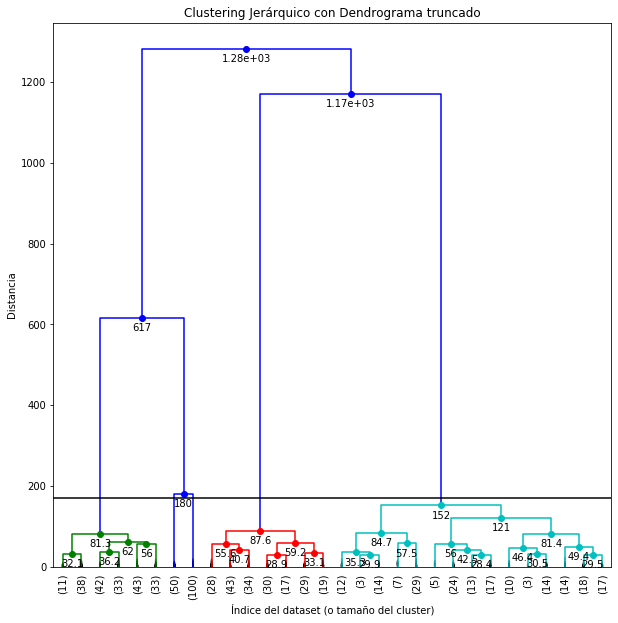

In [59]:
plt.figure(figsize=(10,10))
dendrogram_tune(
    Z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    max_d = 170
)

plt.show()

[1282.46706354 1170.98586166  616.54762239  180.27043021  151.60666456
  121.12826348   87.63025871   84.6531831    81.40781749   81.26914533]


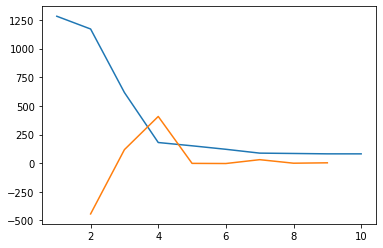

El número óptimo de clusters es 4


In [60]:
last = Z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx= np.arange(1,len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() + 2
print("El número óptimo de clusters es %s"%str(k))

In [61]:
print(inconsistent(Z2,5)[-10:])

[[ 17.77607317  18.87474236  30.           3.36391729]
 [ 15.23571589  17.63042243  29.           3.75329076]
 [ 17.5423546   18.98041797  25.           3.53579297]
 [ 19.71893206  18.70559634  31.           3.63053524]
 [ 25.39008081  26.21789135  28.           3.6516355 ]
 [ 36.46474732  34.13171399  30.           3.3734584 ]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 43.46845429 111.71230335  31.           5.12995571]
 [ 80.34950945 205.0127263   31.           5.31984707]
 [147.0446429  308.44162511  31.           3.68115821]]


### Recuperar los clusters y sus elementos

In [62]:
from scipy.cluster.hierarchy import fcluster

In [63]:
max_d=20
clusters=fcluster(Z, max_d, criterion="distance")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [65]:
k=3
clusters=fcluster(Z,k,criterion="maxclust")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [66]:
fcluster(Z,8,depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

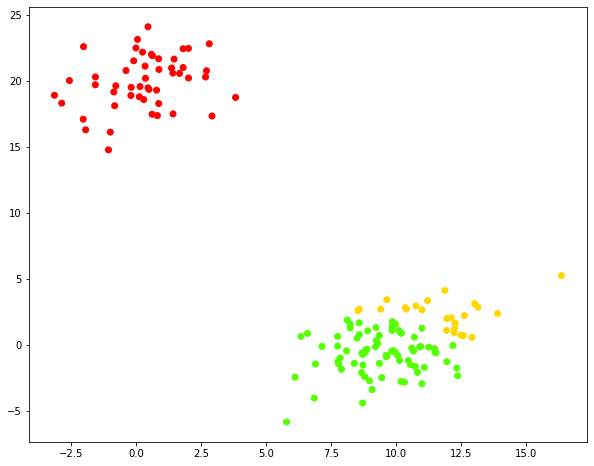

In [67]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap="prism")
plt.show()

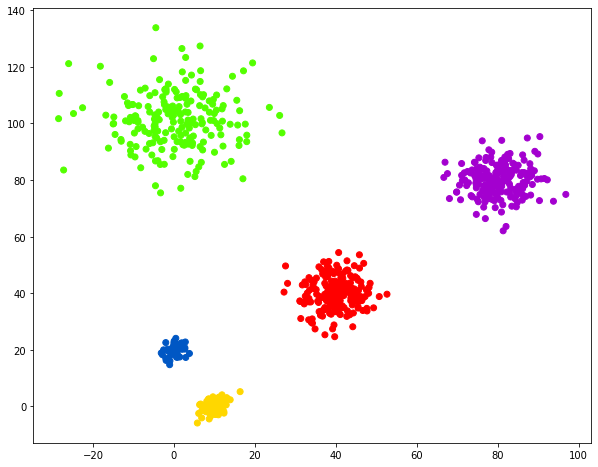

In [70]:
max_d=170
clusters=fcluster(Z2, max_d, criterion="distance")
clusters

plt.figure(figsize=(10,8))
plt.scatter(x2[:,0], x2[:,1], c=clusters, cmap="prism")
plt.show()